## **1- Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import os
from tensorflow.keras.models import *
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing import image


c:\ProgramData\New folder\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **2- read dataset**

In [2]:
# read images
train_path = "E:/covid-19/covid-19/COVID_CTandXRAY_11_dataset_5011_CL_Benchmark/test"
test_path = "E:/covid-19/covid-19/COVID_CTandXRAY_11_dataset_5011_CL_Benchmark/test"

image_category = os.listdir("E:/covid-19/covid-19/COVID_CTandXRAY_11_dataset_5011_CL_Benchmark/test")

## **Visualizing images**

In [6]:
#plotting images 
def plot_images(image_category):
    
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(image_category):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img) / 255
        
        plt.subplot(3,4, i+1)
        plt.imshow(img_arr)
        plt.title(category)
        plt.axis('off')
        
    plt.show()   

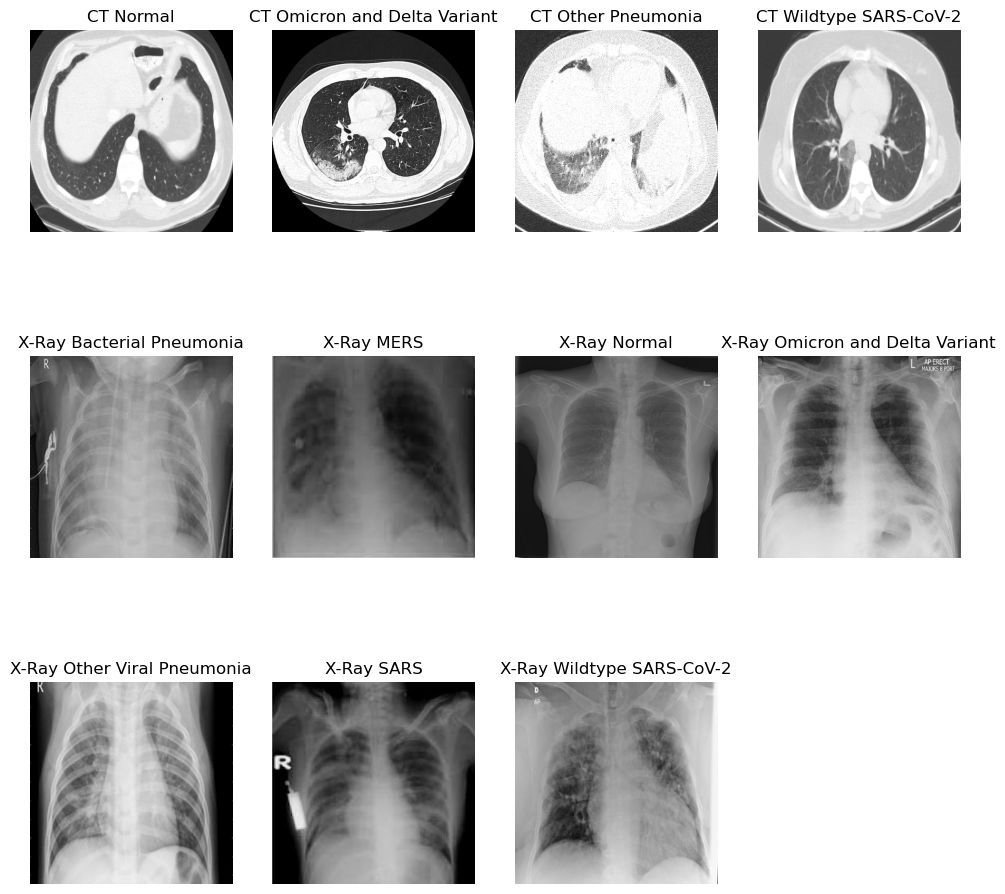

In [7]:
plot_images(image_category)

## **4- data augmentation**

In [10]:
# data augmentation
data_aug = ImageDataGenerator(rescale = 1.0/255.0)

In [11]:
#1- train data
train_data = data_aug.flow_from_directory(
                                                train_path,
                                                target_size = (512,512),
                                                batch_size = 10,
                                                )

Found 3939 images belonging to 11 classes.


In [12]:
#2- test data
test_data = data_aug.flow_from_directory(
                                                test_path,
                                                target_size = (512,512),
                                                batch_size = 10,
                                                )

Found 1072 images belonging to 11 classes.


## **5- model building**

In [13]:
#model building
cnn_model = Sequential()

#add layers
cnn_model.add(Conv2D(filters = 32, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu', input_shape = [512,512,3]))

cnn_model.add(MaxPooling2D(pool_size= (2,2)))


cnn_model.add(Conv2D(filters = 64, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu'))
cnn_model.add(MaxPooling2D())


cnn_model.add(Conv2D(filters = 128, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu'))
cnn_model.add(MaxPooling2D())


#flatten layer
cnn_model.add(Flatten())

#fully connected cnn
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(64, activation = 'relu'))

cnn_model.add(Dense(11, activation = 'softmax'))

## **6- compile model**

In [14]:
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

## **7- fit model**

In [15]:
model_history = cnn_model.fit(train_data,
                             epochs = 20,
                             validation_data = test_data,
                             )

Epoch 1/20
394/394 [==============================] - 76s 160ms/step - loss: 1.0590 - accuracy: 0.6522 - val_loss: 1.0064 - val_accuracy: 0.6353
Epoch 2/20
394/394 [==============================] - 41s 103ms/step - loss: 0.4910 - accuracy: 0.8205 - val_loss: 1.0859 - val_accuracy: 0.6884
Epoch 3/20
394/394 [==============================] - 40s 101ms/step - loss: 0.3188 - accuracy: 0.8792 - val_loss: 1.0120 - val_accuracy: 0.7724
Epoch 4/20
394/394 [==============================] - 40s 101ms/step - loss: 0.2216 - accuracy: 0.9236 - val_loss: 1.5412 - val_accuracy: 0.7528
Epoch 5/20
394/394 [==============================] - 40s 101ms/step - loss: 0.1288 - accuracy: 0.9566 - val_loss: 1.3838 - val_accuracy: 0.7920
Epoch 6/20
394/394 [==============================] - 39s 98ms/step - loss: 0.1137 - accuracy: 0.9622 - val_loss: 1.3760 - val_accuracy: 0.7799
Epoch 7/20
394/394 [==============================] - 41s 103ms/step - loss: 0.0759 - accuracy: 0.9744 - val_loss: 1.6098 - val_acc

## **8- plotting**

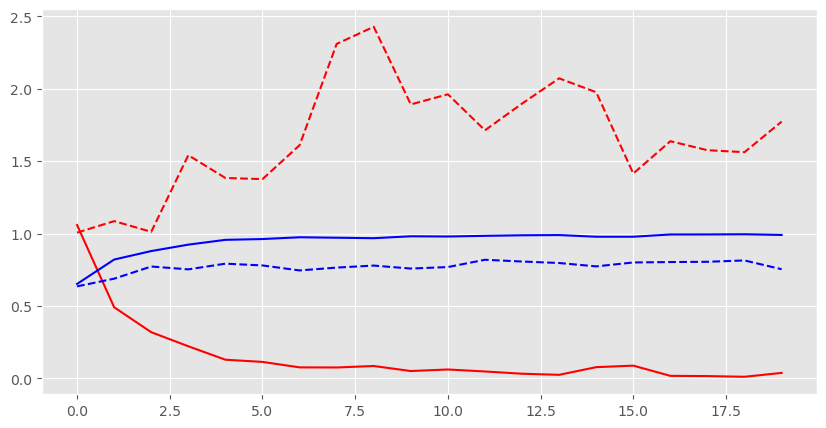

In [16]:
#plot error and accuracy
h = model_history.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

plt.plot(h['loss'], c = 'red', label = 'training loss')
plt.plot(h['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

plt.plot(h['accuracy'], c = 'blue', label = 'training accuracy')
plt.plot(h['val_accuracy'], c = 'blue', label = 'training loss', linestyle = '--')

## **9- Evaluation**

In [17]:
cnn_model.evaluate(test_data)

108/108 [==============================] - 7s 60ms/step - loss: 1.7729 - accuracy: 0.7537


[1.772911548614502, 0.753731369972229]

In [18]:
cnn_model.evaluate(train_data)

394/394 [==============================] - 32s 82ms/step - loss: 0.0789 - accuracy: 0.9764


[0.07888444513082504, 0.9763899445533752]

## **10- predict new image**

In [19]:
testing_image = '/kaggle/input/continual-learning-of-covid19/COVID_CTandXRAY_11_dataset_5011_CL_Benchmark/test/X-Ray MERS/MERS (1).png'

In [20]:
class_map = dict([v,k] for k,v in train_data.class_indices.items())
class_map

{0: 'CT Normal',
 1: 'CT Omicron and Delta Variant',
 2: 'CT Other Pneumonia',
 3: 'CT Wildtype SARS-CoV-2',
 4: 'X-Ray Bacterial Pneumonia',
 5: 'X-Ray MERS',
 6: 'X-Ray Normal',
 7: 'X-Ray Omicron and Delta Variant',
 8: 'X-Ray Other Viral Pneumonia',
 9: 'X-Ray SARS',
 10: 'X-Ray Wildtype SARS-CoV-2'}

In [23]:
# testing image
def predictions(testing_image, actual_label):
    
    #load and preprocessing image
    test_img = image.load_img(testing_image, target_size = (512,512))
    test_img_arr = image.img_to_array(test_img)/ 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1] , test_img_arr.shape[2]))
    
    #make prediction
    predicted_label = np.argmax(cnn_model.predict(test_img_input))
    predicted_img = class_map[predicted_label]
    
    
    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title("predicted label: {}, actual label : {}".format (predicted_img, actual_label))
    plt.grid()
    plt.axis('off')

1/1 [==============================] - 0s 270ms/step


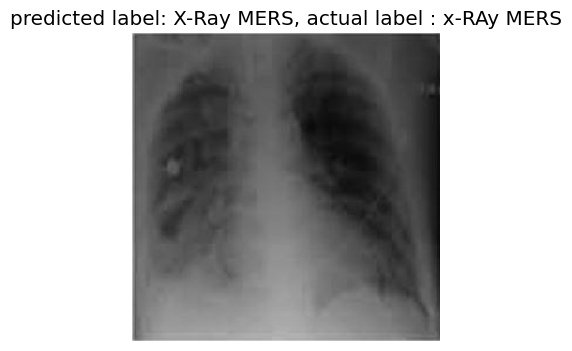

In [24]:
predictions(testing_image, actual_label= 'x-RAy MERS')

In [25]:
#save model
cnn_model.save('covid_19_model2.h5')